# Faces PCA Example
An example of using PCA with a 20 image faces dataset.    
Matt Kretchmar  
February 2021

In [1]:
# import statements
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy import linalg as la


## Dataset
Our dataset consists of 20 black and white images.  Each image is stored in jpg format with resolution of 112 x 92 pixels.   The first 10 images are Dr. Matt Neal (named MattN1.jpg ... MattN10.jpg) while the last 10 images re Dr. Matt Kretchmar (named MattK1.jpg ... MattK10.jpg).  

When loaded into a numpy array, we will have a 2D (92x112) array of grayscale values 0 to 255.  We transform this into a $\texttt{data}$ variable that has each row as a 10,304 array of pixel values, with 20 rows of data.  Data will be a 20x10304 numpy array.  

JPEG (92, 112) L


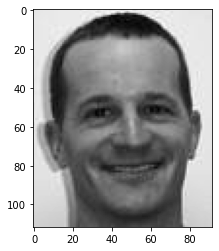

In [2]:
# load an example image and display it
im = Image.open("MattK1.jpg")
#im = im_original.copy()
print(im.format, im.size, im.mode)
#print(im.flags)
#im.setflags(write=1)

plt.imshow(im,cmap='gray')

In [3]:
# Read 20 images of data input and store them in a numpy array where each row is an image
# and each column is an attribute
data = np.zeros((20,10304))

# read 10 images of Matt Neal
for i in range(10):
    filename = 'MattN{0:d}.jpg'.format(i+1)
    print('loading: ',filename)
    im = Image.open(filename)
    a = np.asarray(im)
    a = a.reshape(112*92)
    data[i,:] = a.astype(float)
    
# read 10 images of Matt Kretchmar
for i in range(10):
    filename = 'MattK{0:d}.jpg'.format(i+1)
    print('loading: ',filename)
    im = Image.open(filename)
    a = np.asarray(im)
    a = a.reshape(112*92)
    data[i+10,:] = a.astype(float)
    

    
    

loading:  MattN1.jpg
loading:  MattN2.jpg
loading:  MattN3.jpg
loading:  MattN4.jpg
loading:  MattN5.jpg
loading:  MattN6.jpg
loading:  MattN7.jpg
loading:  MattN8.jpg
loading:  MattN9.jpg
loading:  MattN10.jpg
loading:  MattK1.jpg
loading:  MattK2.jpg
loading:  MattK3.jpg
loading:  MattK4.jpg
loading:  MattK5.jpg
loading:  MattK6.jpg
loading:  MattK7.jpg
loading:  MattK8.jpg
loading:  MattK9.jpg
loading:  MattK10.jpg


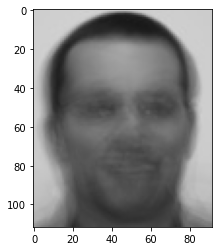

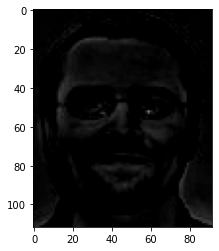

In [4]:
# mean subtract the dataset to form a meanImage.  We can display the "average face"
meanImage = np.mean(data,axis=0)

# dataMS holds the mean-subtracted version of the dataset.  These are called the caricatures of the data. 
dataMS = data - meanImage

# for illustration purposes, we can resconstruct the mean face as an image and display it. 
b = meanImage.reshape((112,92))
im2 = Image.fromarray(b)
plt.imshow(im2,cmap='gray')

plt.figure(2)
# also for illustration, we can display the first caricature -- the first image mean subtracted.  
b = dataMS[0,:].reshape((112,92))
im2 = Image.fromarray(b)
plt.imshow(im2,cmap='gray')


## SnapShot Method
Since our dataset is 20x10304, if we were to compute the regular covariance matrix, it would have dim 10304 x 10304.  This is a HUGE matrix and we would not be able to compute the eigenvectors of this matrix.   

Instead we compute the *sample covariance matrix* where entry $C_{i,j}$ gives the coveriance of how IMAGE $i$ varies with IMAGE $j$ ( in the regular covariance matrix, entry $C_{i,j}$ gives the coveriance of how dimension $i$ varies with dimension $j$).   

We can compute the eigenvectors of the sample covariance matrix (20x20), then "project" the eigenvectors back into full image space to find 20 "eigenvectors" that span the original 10304 dimensional space.   

In [5]:
# compute SAMPLE covariance matrix
C = np.dot(dataMS,dataMS.transpose())
# this should multiply a matrix that is 20x10304 with a matrix that is 10304x20 to produce a 20x20 matrix
#print(C)
print(dataMS.shape)
print(C.shape)


(20, 10304)
(20, 20)


In [6]:
# computes the eigenvectors as COLUMN vectors
evals,evecs = la.eig(C)
print('EigenValues:',evals)
#print(evecs.shape)


# sort indices of eigenvectors by reverse order of eigenvalues (biggest down to smallest)
indices = np.argsort(evals)
indices = indices[::-1]
print(indices)
# re-order the eigenvalues and eigenvalues
evecs = evecs[:,indices]
evals = evals[indices]

print(evals)


EigenValues: [5.35230628e+07+0.j 2.31735710e+07+0.j 2.12153378e+07+0.j
 1.33273007e+07+0.j 1.10366236e+07+0.j 9.05073530e+06+0.j
 7.05843899e+06+0.j 5.25844818e+06+0.j 2.28132272e-09+0.j
 4.10892319e+06+0.j 3.87746791e+06+0.j 3.24940520e+06+0.j
 7.27126713e+05+0.j 2.77449023e+06+0.j 2.42561572e+06+0.j
 2.09074249e+06+0.j 1.79825071e+06+0.j 1.48132489e+06+0.j
 1.12662533e+06+0.j 1.17517645e+06+0.j]
[ 0  1  2  3  4  5  6  7  9 10 11 13 14 15 16 17 19 18 12  8]
[5.35230628e+07+0.j 2.31735710e+07+0.j 2.12153378e+07+0.j
 1.33273007e+07+0.j 1.10366236e+07+0.j 9.05073530e+06+0.j
 7.05843899e+06+0.j 5.25844818e+06+0.j 4.10892319e+06+0.j
 3.87746791e+06+0.j 3.24940520e+06+0.j 2.77449023e+06+0.j
 2.42561572e+06+0.j 2.09074249e+06+0.j 1.79825071e+06+0.j
 1.48132489e+06+0.j 1.17517645e+06+0.j 1.12662533e+06+0.j
 7.27126713e+05+0.j 2.28132272e-09+0.j]


In [7]:
# Project data back into full dimensionality to find the "native eigenvectors" as row vectors now
V = np.dot(evecs.transpose(),data)
print(V.shape)

(20, 10304)


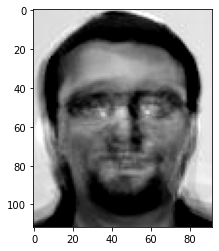

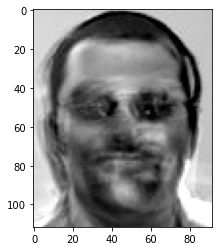

In [8]:
# show first eigenface
b = (V[0,:]+meanImage).reshape((112,92))
im2 = Image.fromarray(b)
plt.imshow(im2,cmap='gray')

# show second eigenface
plt.figure(2)
b = (V[1,:]+meanImage).reshape((112,92))
im2 = Image.fromarray(b)
plt.imshow(im2,cmap='gray')


In [9]:
# We now compute the coefficients for each original image as coordinates that span the eigenspace.  
alpha = np.dot(dataMS,np.linalg.pinv(V))
print(alpha.shape)
# each row is a set of coordinates for an image


(20, 20)


(10304,)


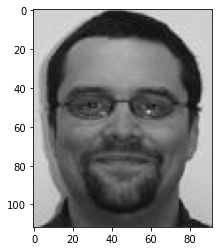

In [10]:
# reconstruct image 1 in full (with 20 terms)
XR1 = np.dot((alpha[0,:]).transpose(),V)

print(XR1.shape)
XR1 = XR1 + meanImage
b = XR1.reshape((112,92))
im2 = Image.fromarray(b)
#im2.show()
plt.imshow(im2,cmap='gray')


(10304,)


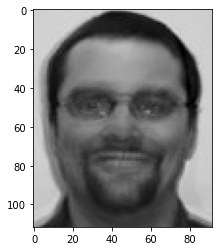

In [11]:
# reconstruct image 1 with 10 terms
k = 10
XR1 = np.dot((alpha[0,:k]).transpose(),V[:k,:])

print(XR1.shape)
XR1 = XR1 + meanImage
b = XR1.reshape((112,92))
im2 = Image.fromarray(b)
#im2.show()
plt.imshow(im2,cmap='gray')


(10304,)


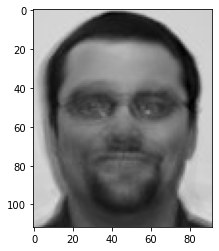

In [12]:
# reconstruct image 1 with 3 terms
k = 3
XR1 = np.dot((alpha[0,:k]).transpose(),V[:k,:])

print(XR1.shape)
XR1 = XR1 + meanImage
b = XR1.reshape((112,92))
im2 = Image.fromarray(b)
#im2.show()
plt.imshow(im2,cmap='gray')





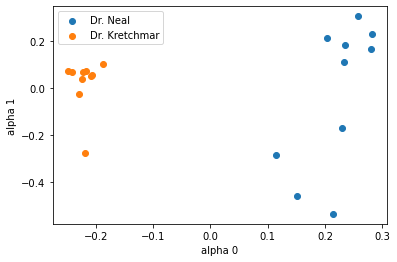

In [13]:
#plot the first two coefficients of alpha for each point
plt.scatter(alpha[:10,0],alpha[:10,1])
plt.scatter(alpha[10:,0],alpha[10:,1])
plt.xlabel('alpha 0')
plt.ylabel('alpha 1')
plt.legend(['Dr. Neal','Dr. Kretchmar'])
plt.show()


## Summary
The above graphic is critical.  We have projected a set of 20 data points from 10304 dimensional space down into two-dimensional space.  The $\alpha_0$ and $\alpha_1$ coordinates for each data point are shown in the plot above.  We can easily see the "separation" of the 20 images.  In fact, by just looking at the first coordinate ($\alpha_0$) we can determine if an image is Dr. Neal ($\alpha_0 > 0$) or Dr. Kretchmar ($\alpha_0 < 0$).   The "image classification problem" becomes trivial once we project the data into this new space.  

## Caveat
It is important to realize that this is a *data dependent* transformation.  The vector space we found is explicitly determined by the 20 samples in our test data.  We can perfectly represent and reconstruct any of these 20 samples because the eigenvectors span the 20d space in which all these data points lie.   If we were to take a *new* data point (from a testing set?), the ability of this space to represent the image depends on how similar the image is to our training samples.  If the image is very similar, then we would expect that we can _nearly_ represent the image perfectly by this basis.  If the image is very dissimilar (maybe a picture of a dog, or a landscape picture), then this basis will not suite the data point well.  We can still project this dissimilar image into this new basis, but the _reconstruction_ of this image using the basis will produce poor results.  